## 线性回归

算法推导过程中已经给出了求解方法，基于最小二乘法直接求解，但这并不是机器学习的思想，由此引入了梯度下降方法。本次实验课重点讲解其中每一步流程与实验对比分析。

### 主要内容：
* 线性回归方程实现
* 梯度下降效果
* 对比不同梯度下降策略
* 建模曲线分析
* 过拟合与欠拟合
* 正则化的作用
* 提前停止策略

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore') 
np.random.seed(42) 

### 回归方程：
当做是一个巧合就可以了，机器学习中核心的思想是迭代更新

![title](./img4/线性回归/1.png)

In [2]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+ 3*X +np.random.randn(100,1) 
X.shape 
#这部分是数据的构造

(100, 1)

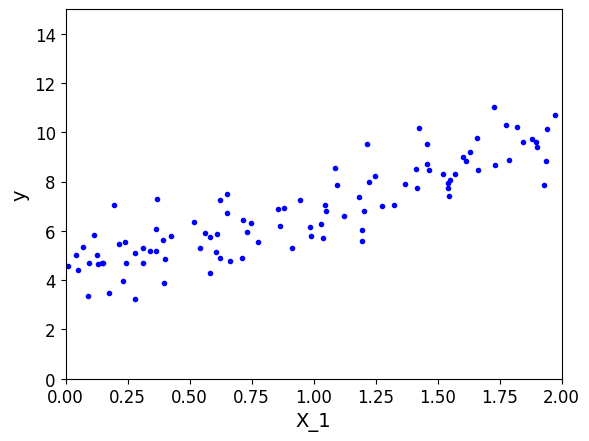

In [3]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,15]) 
plt.show()

In [4]:
#下面借助numpy工具箱写一下最小二乘法的代码
X_b = np.c_[np.ones((100,1)),X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

In [5]:
theta_best #显示最小二乘法得到的theta参数

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0],[2]]) #创建一个返回值是ndarray的数组。
X_new_b = np.c_[np.ones((2,1)),X_new] 
y_predict = X_new_b.dot(theta_best) 
y_predict

array([[4.21509616],
       [9.75532293]])

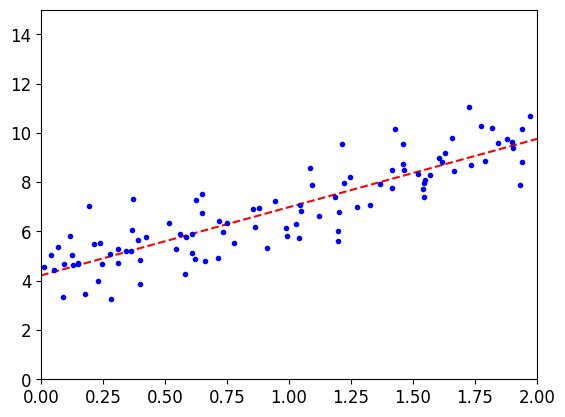

In [7]:
plt.plot(X_new,y_predict,'r--') 
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

### sklearn api文档：
不用背，用到的时候现查完全够用的。
https://scikit-learn.org/stable/modules/classes.html

In [8]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() #实例化
lin_reg.fit(X,y) #训练用网页中的Methods的fit方法
print (lin_reg.coef_)# 网页中的属性Attributes中有可以调用的属性，coef_ 代表参数theta，也叫权重参数
print (lin_reg.intercept_) # 网页中的属性Attributes中有可以调用的属性，intercept_ 代表截断，也叫偏置参数
#通过输出可以看到有上述我们用numpy下代码得到的结果一致。这样我们就可以用sklearn工具包实现LSE了。

[[2.77011339]]
[4.21509616]


### 梯度下降
核心解决方案，不光在线性回归中能用上，还有其他算法中能用上，比如神经网络

![title](./img4/线性回归/2.png)

#### 问题：步长太小

![title](./img4/线性回归/3.png)

#### 问题：步长太大

![title](./img4/线性回归/4.png)

![title](./img4/线性回归/5.png)

学习率应当尽可能小，随着迭代的进行应当越来越小。

### 标准化的作用:
- 拿到数据之后的标准化操作，sklearn下的预处理模块下就包含。
- sklearn下的预处理模块见：https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- 另外，从有监督学习、无监督学习及模型评估等角度sklearn有说明书，可以参考：https://scikit-learn.org/stable/user_guide.html#user-guide
- 是否需要标准化的介绍：https://blog.csdn.net/shwan_ma/article/details/80154888 并不是所有的情况都需要的。建议：决定数据和方法后搜下需要与否。

![title](./img4/线性回归/6.png)

### 批量梯度下降计算公式
- 由分量theta_j到矩阵化的写法，由此可以由下述矩阵化的公式书写代码。

![title](./img4/线性回归/7.png)

### 批量梯度下降

In [9]:
eta = 0.1 #学习率
n_iterations = 1000 #迭代次数
m = 100 #样本个数
theta = np.random.randn(2,1) #参数的初始点
for iteration in range(n_iterations): #迭代100步
    gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y) #按照上述右侧的公式做矩阵乘法。
    theta = theta - eta*gradients #迭代方向是负梯度

In [10]:
theta #可以看到与之前的LSE是一致的。

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new_b.dot(theta) #做预测

array([[4.21509616],
       [9.75532293]])

In [12]:
#为了观察不同学习率下的实验结果，这里首先定义在以学习率为参数的方法
theta_path_bgd = [] #定义个空列表，用于存储迭代过程中的各个theta值

def plot_gradient_descent(theta,eta,theta_path = None): # 默认theta_path = None用于判断当前theta是否用于保存，当非None时保存迭代的theta
    m = len(X_b) #计算样本个数
    plt.plot(X,y,'b.') #绘制原始数据
    n_iterations = 1000 #设置迭代次数
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta) #以样本X起点0和终点2预测对应的两个y值，连接这两点，就可以绘制当前theta下的回归直线
        plt.plot(X_new,y_predict,'b-') #绘制当前theta下的回归直线
        gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients #用梯度下降方法更新theta
        if theta_path is not None: #当theta_path不为None时，保存theta，把这步迭代后的theta放入theta_path的尾部
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('eta = {}'.format(eta))

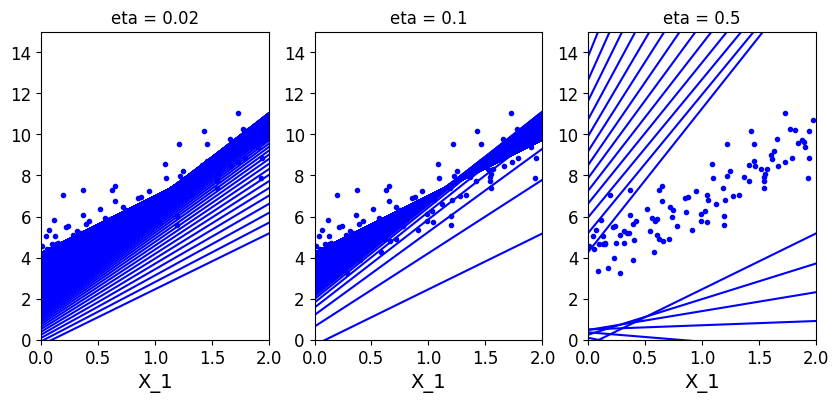

In [13]:
theta = np.random.randn(2,1) #初始化theta，列向量
#公平起见：下面不同学习率下初始的theta用的都是用的同一个theta值（即上行代码随机产生后的theta值）

#观察不同学习率下的实验结果
plt.figure(figsize=(10,4))  
plt.subplot(131) 
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1,theta_path=theta_path_bgd) 
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()

#蓝色线的变化过程反应了theta的迭代过程，另外可以看到学习率较小，每次变化的较小。画出1000条直线，但由于几步之后就稳定了，
#所以都重叠在一起了，这里每个子图都有1000条直线。学习率过大时，如eta=0.5，则产生不太好的效果，学习的效果不太好。
#所以学习率小一点顶多是慢一点，但学习率过大则有做不好的风险。

### 随机梯度下降

![title](./img4/线性回归/8.png)

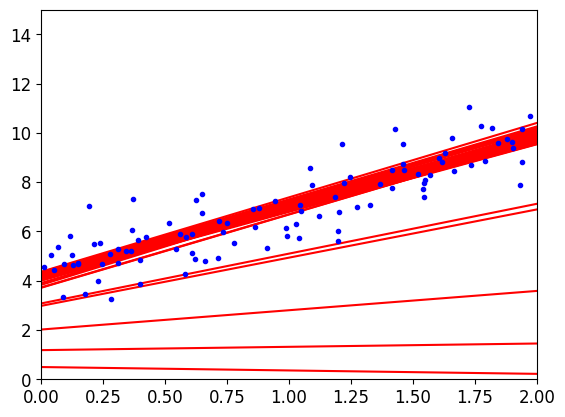

In [14]:
theta_path_sgd=[] 
m = len(X_b)
np.random.seed(42)
n_epochs = 50


#定义学习率的衰减过程：随着迭代步数的增加，loss离最小值点越近时，学习率越小（即步长越小）。
t0 = 5 #t0和t1是人为指定
t1 = 50

def learning_schedule(t):  #学习率的衰减过程，动态调整。
    return t0/(t1+t)  #迭代次数t越大，则分母越大，所以学习率越来越小

theta = np.random.randn(2,1) #初始化theta的选取

for epoch in range(n_epochs): 
    for i in range(m):
        if epoch < 10 and i<10: 
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-') 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] 
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi) #随机梯度下降法的迭代公式
        eta = learning_schedule(epoch*m+i)#学习率的衰减过程，一期有m个，所以epoch*m。
        theta = theta-eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])   
plt.show()

### MiniBatch梯度下降

In [15]:
theta_path_mgd=[] 
n_epochs = 50
minibatch = 16 #人为设定minibatch的值
theta = np.random.randn(2,1)
t0, t1 = 200, 1000
def learning_schedule(t): #学习率的衰减
    return t0 / (t + t1)
np.random.seed(42) 
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m) #随机排列一个序列，或者数组
    
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch):
        t+=1
        xi = X_b_shuffled[i:i+minibatch]
        yi = y_shuffled[i:i+minibatch]
        gradients = 2/minibatch* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta-eta*gradients
        theta_path_mgd.append(theta) #存储theta值的迭代过程



In [16]:
theta

array([[4.25490685],
       [2.80388784]])

### 3种策略的对比实验

In [17]:
theta_path_bgd = np.array(theta_path_bgd) 
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

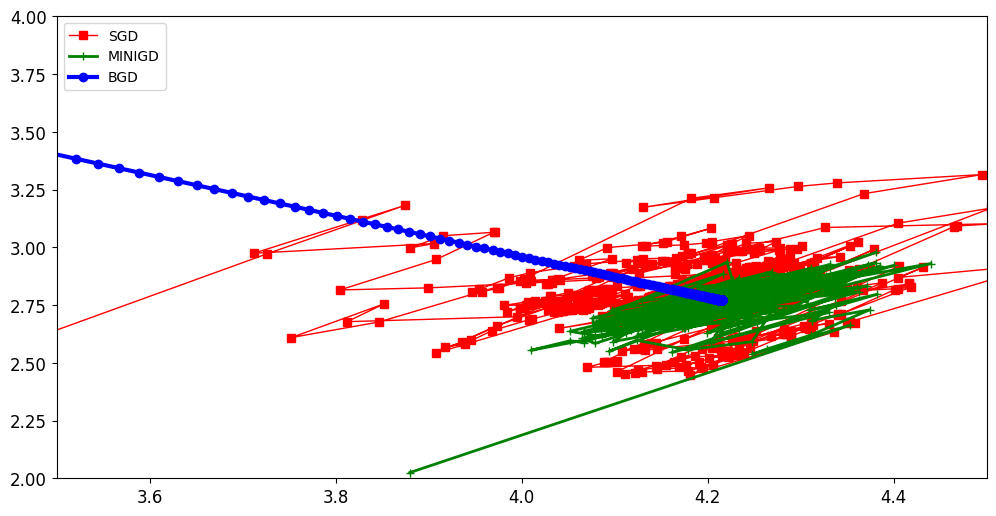

In [18]:
plt.figure(figsize=(12,6))#指定图片大小
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',linewidth=1,label='SGD')#随机梯度下降 红色's'代表的符号，线宽1
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',linewidth=2,label='MINIGD')#Minibatch梯度下降 绿色'+'代表的符号，线宽2
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',linewidth=3,label='BGD')#批量梯度下降 蓝色'o'代表的符号，线宽3
plt.legend(loc='upper left')
plt.axis([3.5,4.5,2.0,4.0]) #为了图形的辨别性，限定x和y的显示范围
plt.show()

#可以看到BGD是直接到收敛点去的，但对所有样本要计算，对规模大的问题会耗时。

实际当中用minibatch比较多，一般情况下选择batch数量应当越大越好。

### 多项式回归

In [19]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2+X+np.random.randn(m,1)

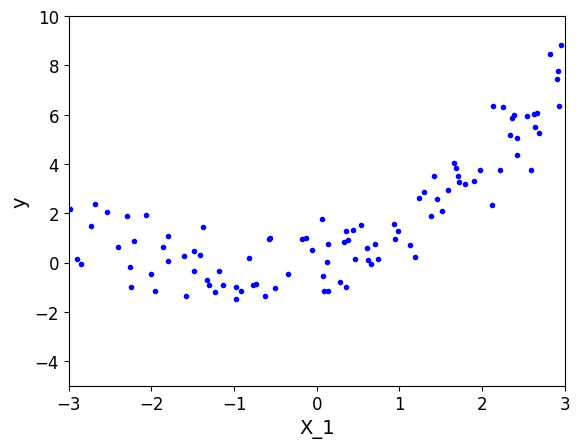

In [20]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,-5,10])
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False) #实例化，include_bias偏置项不加入，即include_bias = False
#If include_bias =  True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [22]:
X_poly[0] #即X转化为array([X, X^2 ])

array([2.38942838, 5.709368  ])

In [23]:
2.38942838 ** 2

5.709367983149424

In [24]:
from sklearn.linear_model import LinearRegression #和上面的代码一样，只是输入的X转化为array([X, X^2 ])
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print (lin_reg.coef_) #权重项，[theta_1,theta_2]
print (lin_reg.intercept_) #偏置项 theta_0

[[0.95038538 0.52577032]]
[-0.0264767]


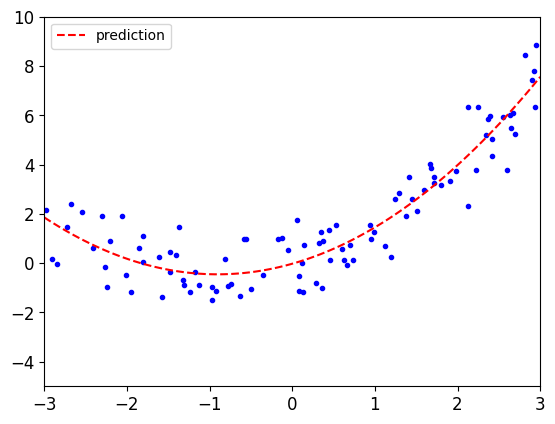

In [25]:
X_new = np.linspace(-3,3,100).reshape(100,1) 
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly) #训练参数用的就是转化后的数据，所以在predict中也要输入转化后的数据，即不能用X_new要用X_new_poly。
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--',label='prediction')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()#可以看到用线性回归做的结果不一定是线性的，可以通过改变特征为非线性特征来达到非线性回归的目的。

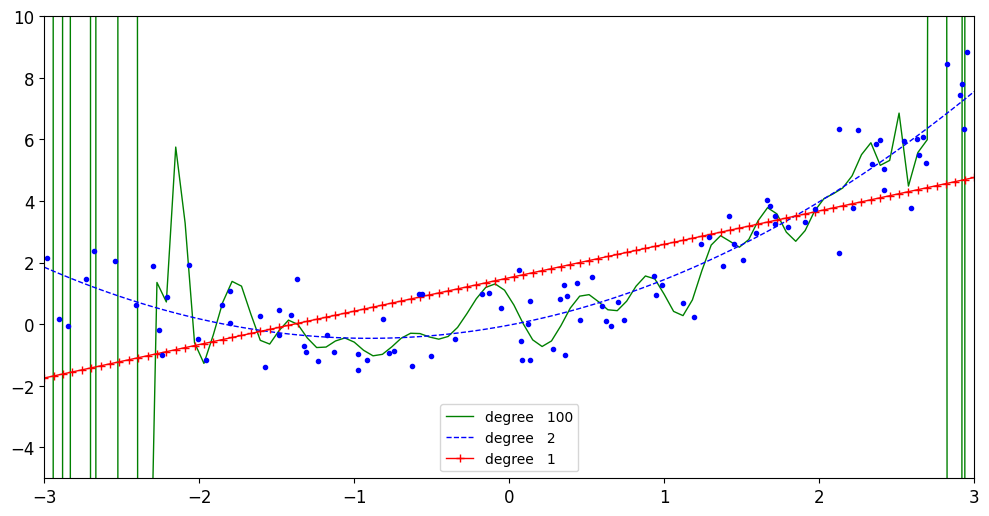

In [26]:
#不同degree下的对比实验--多项式回归
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
plt.figure(figsize=(12,6))
for style,width,degree in (('g-',1,100),('b--',1,2),('r-+',1,1)): #三组实验，参数是(颜色+线条，线宽，degree取值)
    poly_features = PolynomialFeatures(degree = degree,include_bias = False) #多项式特征转化
    std = StandardScaler()
    lin_reg = LinearRegression() #建模
    polynomial_reg = Pipeline([('poly_features',poly_features),
             ('StandardScaler',std),
             ('lin_reg',lin_reg)]) #Pipeline内部参数分别是[('自己定义流程1的名字'，流程1),('自己定义流程2的名字'，流程2)...]
    polynomial_reg.fit(X,y) #训练模型
    y_new_2 = polynomial_reg.predict(X_new) #用数据X_new做预测（用于后续画图），得到的预测结果记为y_new_2
    plt.plot(X_new,y_new_2,style,label = 'degree   '+str(degree),linewidth = width) #style,width,degree在for循环的定义中都有定义
plt.plot(X,y,'b.') #原始数据绘图
plt.axis([-3,3,-5,10])
plt.legend()
plt.show() #展示三个不同degree的多项式回归过程，100degree显然是过拟合了。

特征变换的越复杂，得到的结果过拟合风险越高，不建议做的特别复杂。

### 数据样本数量对结果的影响

In [27]:
from sklearn.metrics import mean_squared_error #评估函数
from sklearn.model_selection import train_test_split #功能：对数据集进行分割，分成训练集和测试集的方法（我们是把训练集分为训练集和验证集）
def plot_learning_curves(model,X,y): #定义学习曲线，查看不同样本量下的学习曲线
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state=100)
    train_errors,val_errors = [],[]#定义训练集和验证集的误差
    for m in range(1,len(X_train)): #从一个样本开始训练模型，到用len(X_train)个样本训练模型。即检查不同训练样本个数对验证集下预测误差的影响。
        model.fit(X_train[:m],y_train[:m]) #训练
        y_train_predict = model.predict(X_train[:m])#训练集的预测结果
        y_val_predict = model.predict(X_val)#验证集的预测结果
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m])) #训练集的误差，评估标准MSE
        val_errors.append(mean_squared_error(y_val,y_val_predict)) #验证集的误差，评估标准MSE
    plt.plot(np.sqrt(train_errors),'r-+',linewidth = 2,label = 'train_error') #绘图时用的是RMSE，即sqrt（MSE）
    plt.plot(np.sqrt(val_errors),'b-',linewidth = 3,label = 'val_error') #绘图时用的是RMSE，即sqrt（MSE）
    plt.xlabel('Trainsing set size')
    plt.ylabel('RMSE')
    plt.legend()

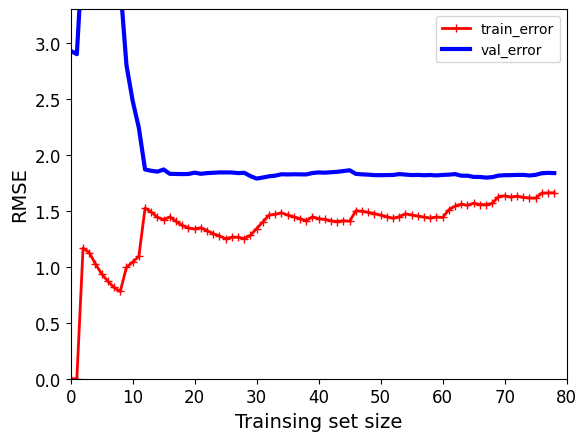

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3.3])
plt.show()#训练样本越少，过拟合风险越大

数据量越少，训练集的效果会越好，但是实际测试效果很一般。实际做模型的时候需要参考测试集和验证集的效果。

### 多项式回归的过拟合风险

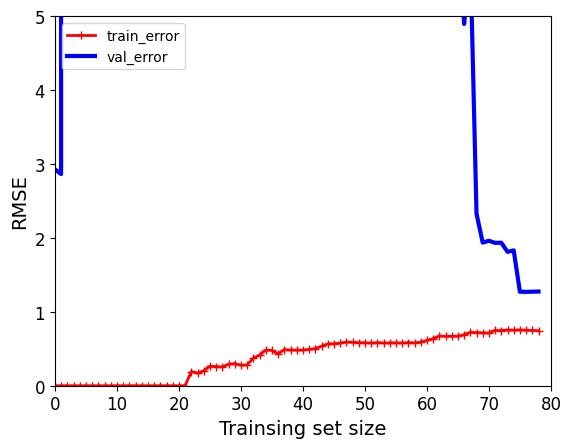

In [29]:
polynomial_reg = Pipeline([('poly_features',PolynomialFeatures(degree = 25,include_bias = False)),
             ('lin_reg',LinearRegression())])
plot_learning_curves(polynomial_reg,X,y)
plt.axis([0,80,0,5])
plt.show()#训练样本越少，过拟合风险越大

越复杂越过拟合

### 正则化

对权重参数进行惩罚，让权重参数尽可能平滑一些，有两种不同的方法来进行正则化惩罚:

![title](./img4/线性回归/9.png)

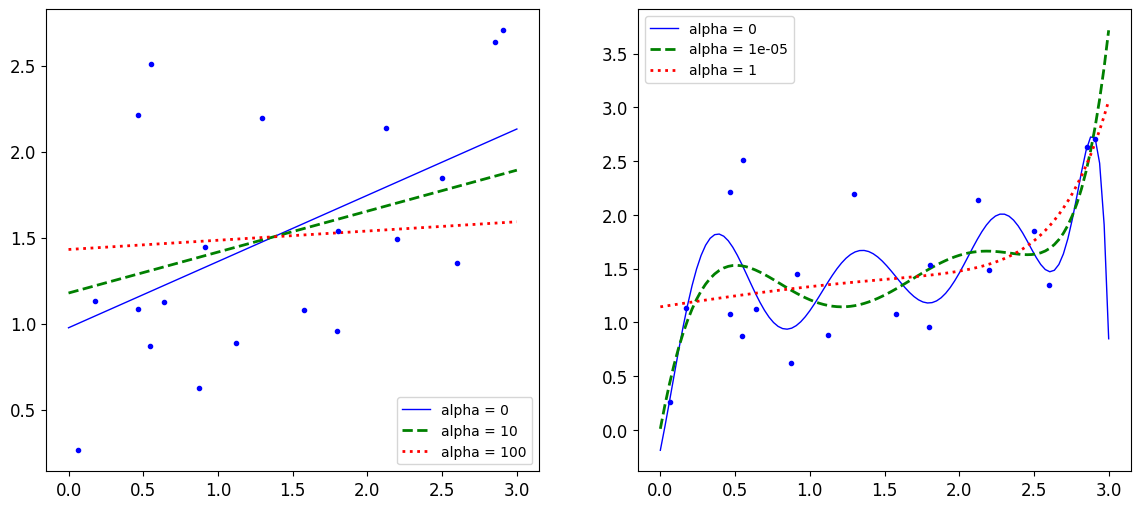

In [30]:
from sklearn.linear_model import Ridge #岭回归
np.random.seed(42)
m = 20 #样本个数
X = 3*np.random.rand(m,1)
y = 0.5 * X +np.random.randn(m,1)/1.5 +1 
X_new = np.linspace(0,3,100).reshape(100,1) #测试数据。

def plot_model(model_calss,polynomial,alphas,**model_kargs): 
    for alpha,style in zip(alphas,('b-','g--','r:')): 
        model = model_calss(alpha,**model_kargs) 
        if polynomial: 
            model = Pipeline([('poly_features',PolynomialFeatures(degree =10,include_bias = False)),
             ('StandardScaler',StandardScaler()),
             ('lin_reg',model)])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1 #指定线条宽度
        plt.plot(X_new,y_new_regul,style,linewidth = lw,label = 'alpha = {}'.format(alpha))
    plt.plot(X,y,'b.',linewidth =3)
    plt.legend()

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas = (0,10,100))
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas = (0,10**-5,1))
plt.show() #可以看到alpha越大，拟合的曲线越平稳，越不易过拟合。

惩罚力度越大，alpha值越大的时候，得到的决策方程越平稳。

![title](./img4/线性回归/10.png)

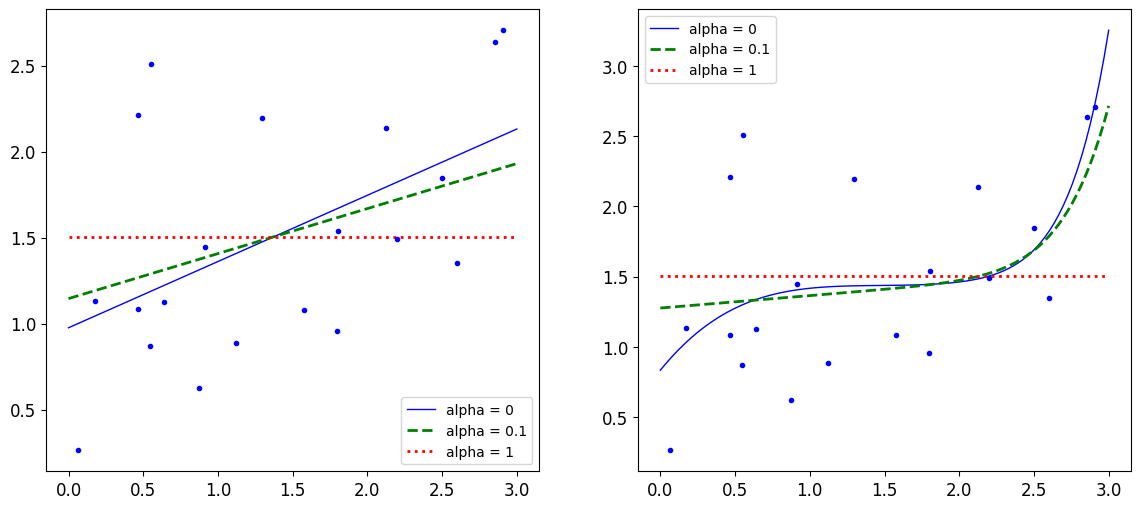

In [31]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas = (0,0.1,1))
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas = (0,10**-1,1))
plt.show()

多做实验，得出结果！！！

思考题：

1如何利用梯度下降来实现线性回归？答案见“回归算法.pdf”

2什么是批量梯度下降？随机梯度下降？小批量梯度下降？它们的区别是什么？答案见“回归算法.pdf”

3在线性回归中，梯度下降算法中的学习率是什么？学习率的取值过大或过小对算法的收敛有什么影响？

在线性回归中，学习率是每一步梯度下降算法中的步长。
选取过大也许会导致每一步迭代的步长过大，影响算法的收敛。选取过小，会导致算法的收敛过慢，增加运行时间和运行成本。

4在数据生成中，如何在y = 1 + 7*X上生成50个随机抖动的数据，使得所有这50个标签不在一条直线上。
其中，将X的取值范围设定在[0,10)之间，生成y的过程中采用高斯分布生成随机数。

In [ ]:
import numpy as np
X = 10*np.random.rand(50,1)
y = 1+ 7*X +np.random.randn(50,1)

5给定方阵X，方阵Y，向量z，在满足矩阵和向量乘法的条件下，利用numpy如何计算（X乘以Y的转置）的逆再乘以向量z。即计算(X*Y^T)^{-1}*z.

In [ ]:
theta_best = np.linalg.inv(X.dot(Y.T)).dot(z)

In [ ]:
6 如下代码
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([2, 6])) + 1

问上述代码得到的y是什么？上述代码中np.array的作用是什么？
如何以X为特征，y为标签，用LinearRegression训练模型怎么用代码实现？
R2统计量作为评估标准的得分怎么用代码实现？计算线性回归的系数和偏置项怎么用代码实现？
给定新的特征[4, 1]下，做预测怎么用代码实现？


上述代码中y = 2 * x_0 + 6 * x_1 + 1，代码中的X给的是4组特征，计算出y的四个取值即可。
np.array的作用是把list格式的数据转化为ndarray格式。

In [ ]:
#上述问题中的代码实现如下：
>>> reg = LinearRegression().fit(X, y) #实例化，并训练模型
>>> reg.score(X, y) #R2统计量作为评估标准
>>> reg.coef_ #计算的参数
>>> reg.intercept_ #计算的偏置项
>>> reg.predict(np.array([[4, 1]])) #预测

7代码x2 = x1[m:n]中x2包含x1中的哪些元素？ 

[m:n]为取list中第m+1个元素到第n+1个元素组成的list，其中包含第m+1个元素，不包含第n+1个元素。(从数学上讲，左边是闭区间，右边是开区间)
只所以[m:n]中的m对应list中第m+1个元素，是因为list中第1个元素的索引是0.

In [ ]:
8分析下述代码每句话的含义

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 4,include_bias = False)
X_poly = poly_features.fit_transform(X) 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures #添加多项式特征的方法
poly_features = PolynomialFeatures(degree = 4,include_bias = False) #实例化，include_bias偏置项不加入，即include_bias = False
X_poly = poly_features.fit_transform(X) #fit_transform包含两步操作，1.fit：由x1计算x1,x1^2; 2.transform：把计算好的x1，x1^2转化成[x1,x1^2]的ndarray并做返回。

9在sklearn中要对数据进行标准化，需要import的代码是什么？

标准化特征：from sklearn.preprocessing import StandardScaler #标准化的方法，用的是z = (x - mean) / sigma

10 给定特征集合X，标签y。把数据分割成训练集和测试集，其中训练集占75%，测试集占25%。代码如何实现？


In [ ]:
数据切分方法：

from sklearn.model_selection import train_test_split #功能：数据集进行分割
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25,random_state=100)

In [ ]:
11分析下述代码做了什么？  

from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)
clf.predict(X, y)


In [ ]:
岭回归（回归方法）：from sklearn.linear_model import Ridge 

>>> from sklearn.linear_model import Ridge
>>> import numpy as np
>>> n_samples, n_features = 10, 5 #设置样本个数和特征维数
>>> rng = np.random.RandomState(0)
>>> y = rng.randn(n_samples)#产生随机标签
>>> X = rng.randn(n_samples, n_features)#产生随机特征
>>> clf = Ridge(alpha=1.0)#实例化，设置罚项权重
>>> clf.fit(X, y)#训练模型
>>> clf.predict(X, y)#对X标签进行预测


12如何载入Lasso回归方法？

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
13 下述代码的含义

from scipy.io import loadmat
mnist = loadmat('./mnist-original.mat')'


In [ ]:
载入本地数据方法：from scipy.io import loadmat
mnist = loadmat('./mnist-original.mat') # .mat是matlab的数据储存格式

14 如何在python中载入文件名stock_data.csv的csv格式的数据？进而载入列名为Close的收盘价数据，进行归一化，再分割训练集和测试集，占比8:2。

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# 读取股票价格数据
data = pd.read_csv('stock_data.csv')
prices = data['Close'].values #读取收盘价 利用values将DataFrame格式到ndarray格式进行转换，从而利用Numpy包库后续计算
# 数据预处理：归一化
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices.reshape(-1, 1))
# 划分数据集为训练集和测试集
train_size = int(len(prices) * 0.8)
train_data, test_data = prices[:train_size], prices[train_size:]
# 后续若利用sklearn，需要把数据转化为ndarray

15如何查看ndarray格式下X的数据规模？

查看数据规模：X.shape

In [ ]:
16 下述代码的目的是什么？

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [ ]:
洗牌方法：

import numpy as np
shuffle_index = np.random.permutation(60000)#随机产生一个序列 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] #由此对训练集打乱顺序

17如何将多重list表示的矩阵，拉直成一重？

多维数组拉直：y_train_5 = y_train_5.flatten()#flatten()将数组拉直（多维数组降为一维数组） y_train_5不降维之前是array([[]])

18随机梯度下降分类器如何调用？如何实例化,训练模型，并预测？

In [ ]:
随机梯度下降分类器（分类问题）：

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, random_state=42) #实例化
sgd_clf.fit(X,y) #训练模型fit要传进来训练集的2个参数，一个样本，一个标签
sgd_clf.predict([X[35000]]) #预测


19随机梯度下降回归器如何调用？如何实例化,训练模型，并预测？

In [ ]:
随机梯度下降回归器（回归问题）： from sklearn.linear_model import SGDRegressor

import numpy as np
from sklearn.pipeline import make_pipeline #引入管道
from sklearn.preprocessing import StandardScaler #引入标准化
n_samples, n_features = 10, 5 #设置样本个数，特征维数
rng = np.random.RandomState(0)
y = rng.randn(n_samples) #设置10个随机样本的标签
X = rng.randn(n_samples, n_features) #设置10个随机样本的5维特征
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)) #实例化
reg.fit(X, y) #训练
reg.predict(X) #预测

In [ ]:
20以下哪种技术对于减少数据集的维度会更好 
A.删除缺少值太多的列
B.删除数据差异较大的列
C.删除不同数据趋势的列
D.都不是


In [ ]:
A

In [ ]:
21如果你训练的模型代价函数J随着迭代次数的增加，绘制出来的图如下，那么 

![title](./img4/线性回归/tu21.png)

In [ ]:
A.无论你在使用mini-batch还是批量梯度下降，看上去都是合理的
B.如果你正在使用mini-batch梯度下降，那可能有问题；而如果你在使用批量梯度下降，那是合理的
C.如果你正在使用mini-batch梯度下降，那看上去是合理的；而如果你在使用批量梯度下降，那可能有问题
D.无论你在使用mini-batch还是批量梯度下降，都可能有问题

In [ ]:
C

In [ ]:
22回归问题和分类问题的区别是？
A.回归问题有标签，分类问题没有
B.回归问题输出值是离散的，分类问题输出值是连续的
C.回归问题输出值是连续的，分类问题输出值是离散的
D.回归问题与分类问题在输入属性值上要求不同

In [ ]:
C

In [ ]:
23向量 x=[1,2,3,4,-9,0]的 L1 范数是多少？
A.1
B.19
C.6
D.15

In [ ]:
B

In [ ]:
24下列哪种方法可以用来缓解过拟合的产生：
A.增加更多的特征
B.正则化
C.增加模型的复杂度
D.以上都是


In [ ]:
B

25在凸优化中只有一个全局最优解?

对

26大部分的机器学习工程中，数据搜集、数据清洗、特征工程这三个步骤绝大部分时间，而数据建模，占总时间比较少？

对

In [ ]:
27随机梯度下降，每次迭代时候，使用一个样本。
A.正确
B.错误

In [ ]:
A

In [ ]:
28L2 正则化得到的解更加稀疏。
A.正确
B.错误

In [ ]:
B

In [ ]:
29对训练数据归一化的根本原因是？
A.归一化也可以说是一种正则化处理，可以提升模型泛化能力
B.让模型更快的收敛
C.加快参数初始化过程
D.更容易对数据进行可视化

In [ ]:
B

30对数据进行标准化、归一化的代码分别如何实现？

In [ ]:
#标准化
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
standardScaler = StandardScaler().fit(X)
standardScaler.transform(X)

#上述代码也可以fit和transform一起写，如下：
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
standardScaler = StandardScaler()#实例化
standardScaler.fit_transform(X)#拟合及转换

#归一化
from sklearn.preprocessing import MinMaxScaler
#区间放缩，返回值为放缩到[0,1]区间的数据
minMaxScaler = MinMaxScaler().fit(X)
minMaxScaler.transform(X)
